In [22]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.simplefilter("ignore")

In [4]:
tweets_df = pd.read_csv("../Datasets/vaccination_all_tweets.csv")

In [5]:
print(f"data shape: {tweets_df.shape}")

data shape: (69718, 16)


In [7]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69718 entries, 0 to 69717
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                69718 non-null  int64 
 1   user_name         69718 non-null  object
 2   user_location     53891 non-null  object
 3   user_description  64846 non-null  object
 4   user_created      69718 non-null  object
 5   user_followers    69718 non-null  int64 
 6   user_friends      69718 non-null  int64 
 7   user_favourites   69718 non-null  int64 
 8   user_verified     69718 non-null  bool  
 9   date              69718 non-null  object
 10  text              69718 non-null  object
 11  hashtags          54904 non-null  object
 12  source            69599 non-null  object
 13  retweets          69718 non-null  int64 
 14  favorites         69718 non-null  int64 
 15  is_retweet        69718 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 7.6+ MB


In [8]:
tweets_df.describe()


,id,user_followers,user_friends,user_favourites,retweets,favorites
count,6.971800e+04,6.971800e+04,69718.000000,6.971800e+04,69718.000000,69718.000000
mean,1.372171e+18,9.983587e+04,1297.046631,1.602758e+04,3.387647,14.620973
std,1.034539e+16,8.399183e+05,5838.860507,4.420021e+04,69.800400,236.200153
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.366318e+18,1.130000e+02,146.000000,3.780000e+02,0.000000,0.000000
50%,1.373665e+18,5.450000e+02,406.000000,2.257000e+03,0.000000,1.000000
75%,1.380663e+18,2.450000e+03,1180.000000,1.186750e+04,1.000000,3.000000
max,1.385237e+18,1.504513e+07,516578.000000,1.221784e+06,11288.000000,25724.000000


In [9]:
tweets_df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [10]:


def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))



In [11]:


missing_data(tweets_df)



,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,0,0,15827,4872,0,0,0,0,0,0,0,14814,119,0,0,0
Percent,0.0,0.0,22.701454,6.988152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.248458,0.170688,0.0,0.0,0.0
Types,int64,object,object,object,object,int64,int64,int64,bool,object,object,object,object,int64,int64,bool


In [12]:


def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))



In [13]:


unique_values(tweets_df)



,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,69718,69718,53891,64846,69718,69718,69718,69718,69718,69718,69718,54904,69599,69718,69718,69718
Uniques,69718,37139,12761,35883,37789,12271,6052,22440,2,68930,69621,23965,211,300,636,1


In [14]:


def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))



In [15]:


most_frequent_values(tweets_df)



,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,69718,69718,53891,64846,69718,69718,69718,69718,69718,69718,69718,54904,69599,69718,69718,69718
Most frequent item,1377661711302467587,Workout Solutions,India,George Tsanis – Workout Solutions Health and F...,2010-09-20 17:01:08,1200,0,0,False,2021-04-21 12:30:00,Got my second dose of the #Moderna #vaccine to...,['Moderna'],Twitter Web App,0,0,False
Frequence,1,2080,2294,2080,2080,639,698,947,62500,4,16,4094,21554,47583,30190,69718
Percent from total,0.001,2.983,4.257,3.208,2.983,0.917,1.001,1.358,89.647,0.006,0.023,7.457,30.969,68.251,43.303,100.0


In [17]:

def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 127757 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 27784 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 35799 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Library/Frameworks/

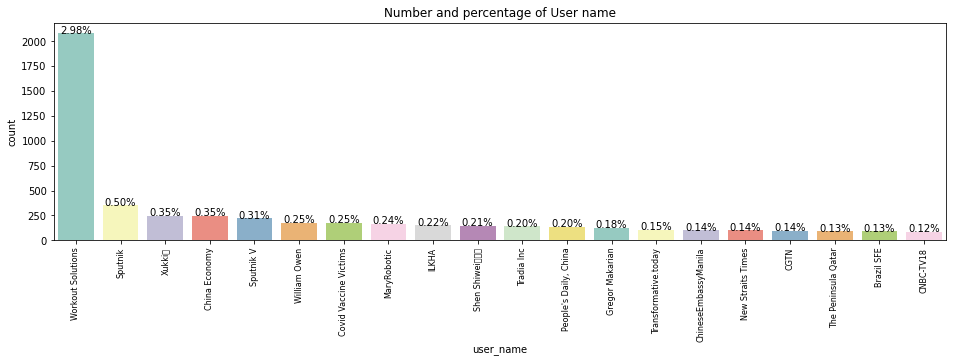

In [18]:
plot_count("user_name", "User name", tweets_df,4)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


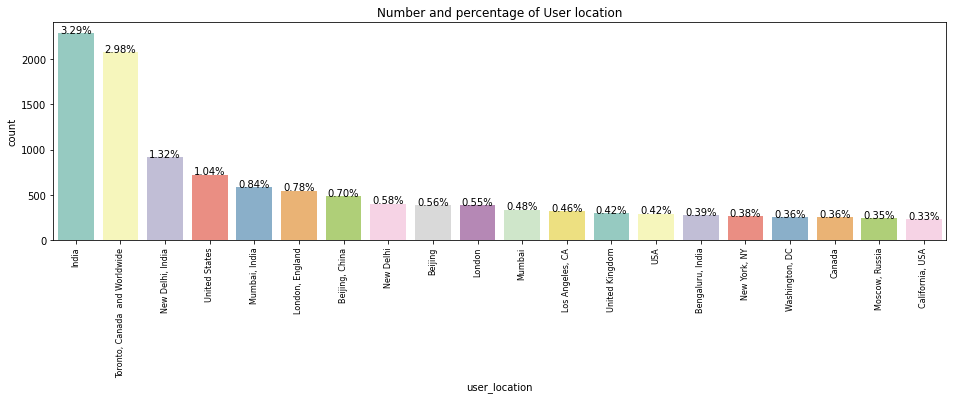

In [19]:


plot_count("user_location", "User location", tweets_df,4)



/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


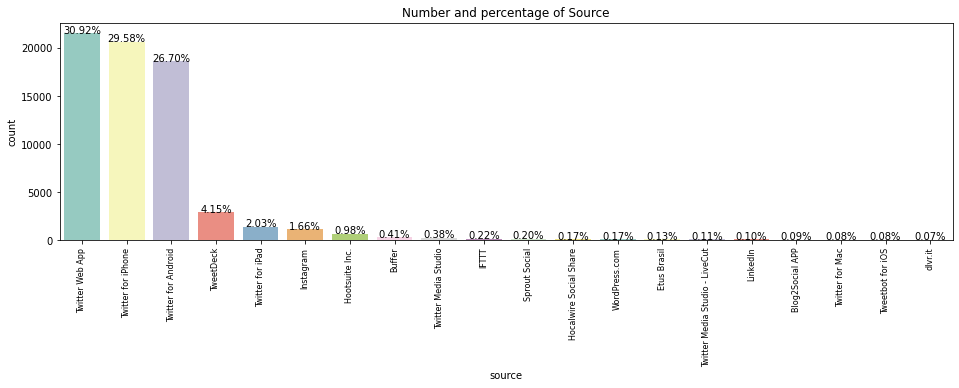

In [20]:


plot_count("source", "Source", tweets_df,4)



In [23]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [24]:
from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

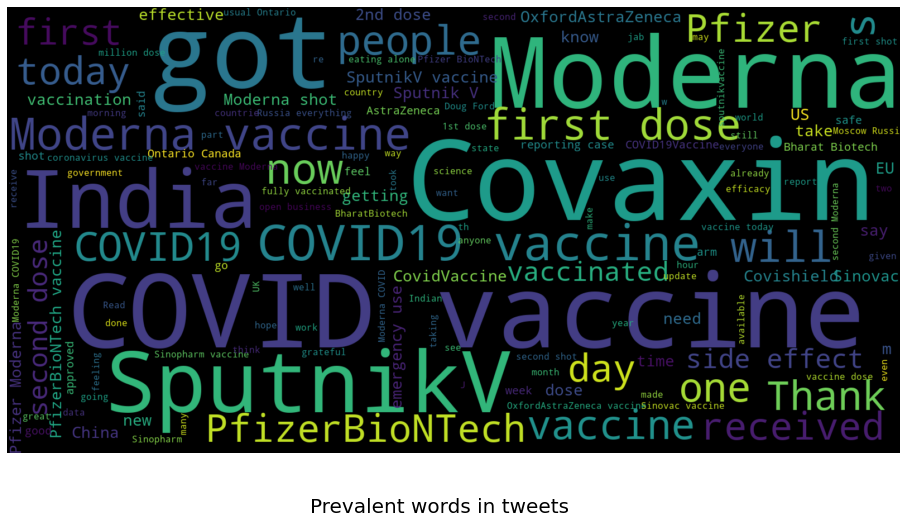

In [25]:
show_wordcloud(tweets_df['text'], title = 'Prevalent words in tweets')

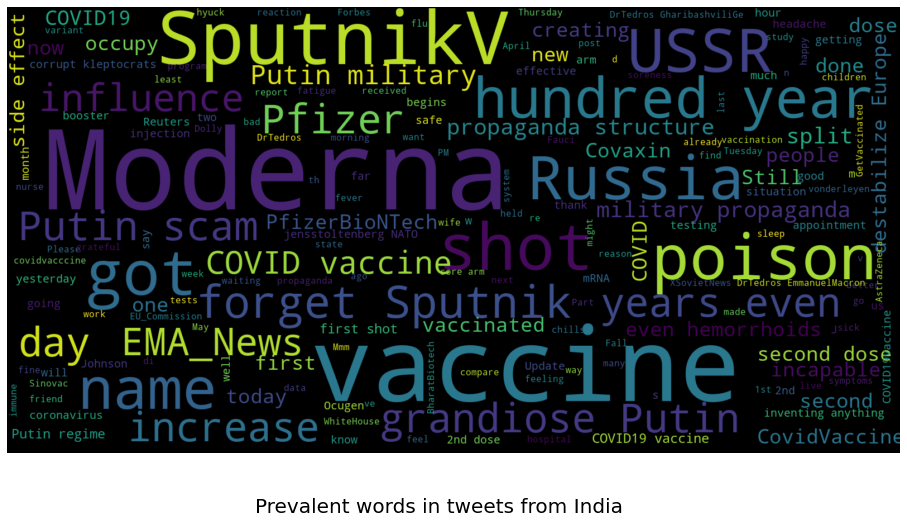

In [26]:
india_df = tweets_df.loc[tweets_df.user_location=="USA"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from USA')

In [27]:


def plot_features_distribution(features, title, df, isLog=False):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(df[feature]),kde=True,hist=False, bins=120, label=feature)
        else:
            sns.distplot(df[feature],kde=True,hist=False, bins=120, label=feature)
    plt.xlabel('')
    plt.legend()
    plt.show()



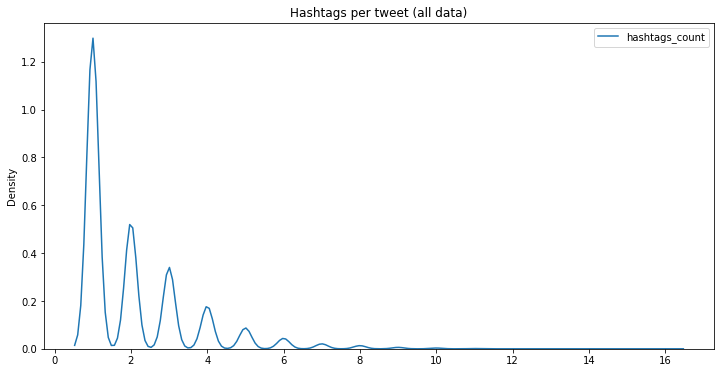

In [28]:


tweets_df['hashtags'] = tweets_df['hashtags'].replace(np.nan, "['None']", regex=True)
tweets_df['hashtags'] = tweets_df['hashtags'].apply(lambda x: x.replace('\\N',''))
tweets_df['hashtags_count'] = tweets_df['hashtags'].apply(lambda x: len(x.split(',')))
plot_features_distribution(['hashtags_count'], 'Hashtags per tweet (all data)', tweets_df)



In [29]:
tweets_df['hashtags_individual'] = tweets_df['hashtags'].apply(lambda x: x.split(','))
from itertools import chain
all_hashtags = set(chain.from_iterable(list(tweets_df['hashtags_individual'])))
print(f"There are totally: {len(all_hashtags)}")

There are totally: 18973


In [30]:


tweets_df['hashtags_individual'].head()



0                                 [['PfizerBioNTech']]
1                                           [['None']]
2    [['coronavirus',  'SputnikV',  'AstraZeneca', ...
3                                           [['None']]
4    [['whereareallthesickpeople',  'PfizerBioNTech']]
Name: hashtags_individual, dtype: object

In [31]:


tweets_df['datedt'] = pd.to_datetime(tweets_df['date'])



In [32]:
tweets_df['year'] = tweets_df['datedt'].dt.year
tweets_df['month'] = tweets_df['datedt'].dt.month
tweets_df['day'] = tweets_df['datedt'].dt.day
tweets_df['dayofweek'] = tweets_df['datedt'].dt.dayofweek
tweets_df['hour'] = tweets_df['datedt'].dt.hour
tweets_df['minute'] = tweets_df['datedt'].dt.minute
tweets_df['dayofyear'] = tweets_df['datedt'].dt.dayofyear
tweets_df['date_only'] = tweets_df['datedt'].dt.date

In [33]:
tweets_agg_df = tweets_df.groupby(["date_only"])["text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "count"]

In [34]:
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 

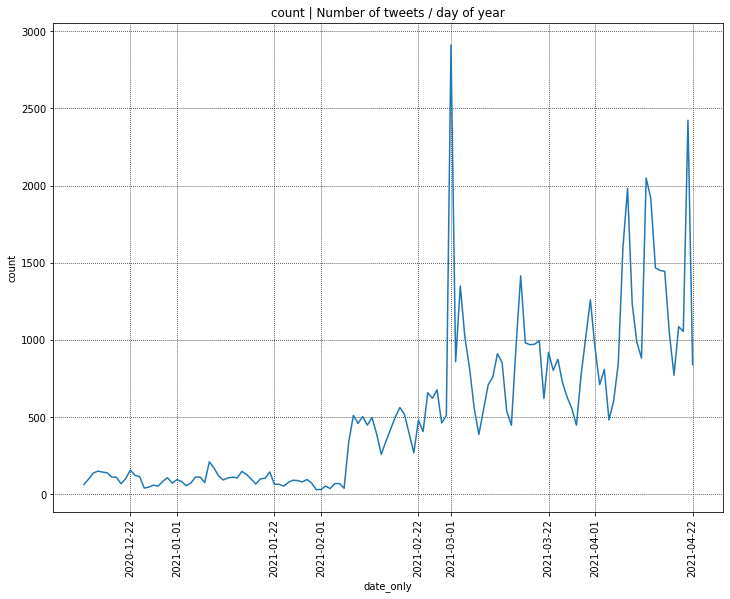

In [35]:
plot_time_variation(tweets_agg_df, title="Number of tweets / day of year",size=3)



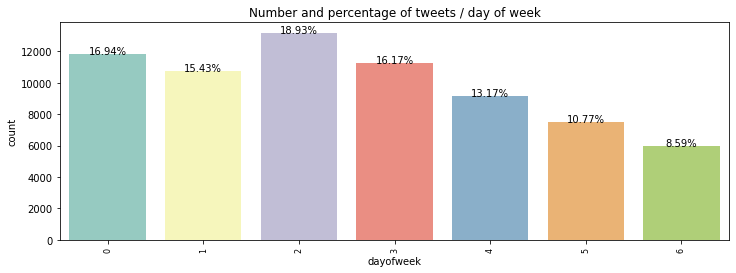

In [36]:
plot_count("dayofweek", "tweets / day of week", tweets_df, size=3, ordered=False)


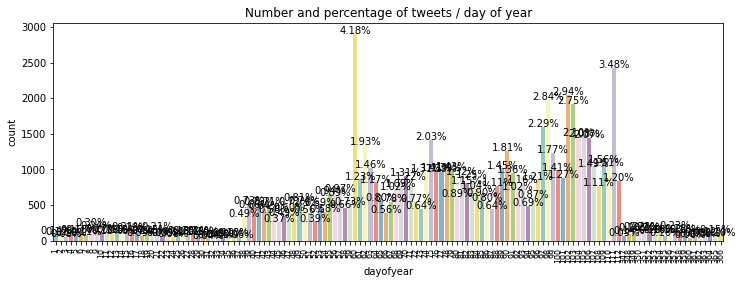

In [37]:
plot_count("dayofyear", "tweets / day of year", tweets_df, size=3, ordered=False)


In [38]:
# borrowed from https://www.kaggle.com/pashupatigupta/sentiments-transformer-vader-embedding-bert
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral" 

LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - '/Users/apurvarajdeepmhatre/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.9/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.9/share/nltk_data'
    - '/Library/Frameworks/Python.framework/Versions/3.9/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************
